# 02 - Exploratory Data Analysis (EDA)

In this notebook, I explore the cleaned dataset using descriptive statistics and visualization to better understand patterns and relationships, especially those linked to customer purchase behaviour.

In [2]:
import pandas as pd

In [3]:
# Load the cleaned dataset
df = pd.read_csv('../data/processed/cleaned_customer_data.csv')

# Preview data
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


---

## Step 1: Target Variable Distribution

I will begin by analyzing the distribution of the target variable `PurchaseStatus`  
to understand the balance between customers who made a purchase (1) and those who did not (0).


In [5]:
# Importing necessary visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style='whitegrid')

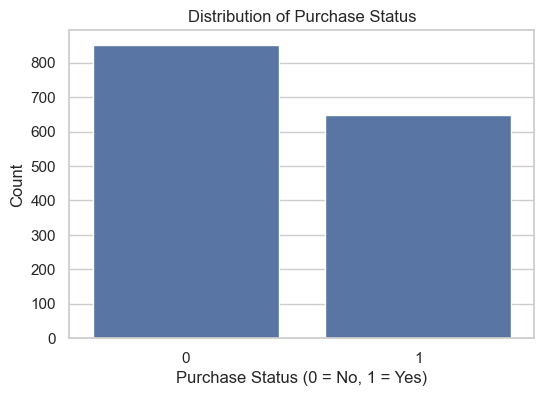

In [9]:
# Count Plot
plt.figure(figsize=(6,4))
sns.countplot(x='PurchaseStatus', data=df)
plt.title('Distribution of Purchase Status')
plt.xlabel('Purchase Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [10]:
# Percentage distribution
purchase_counts = df['PurchaseStatus'].value_counts(normalize=True) * 100
print(purchase_counts.round(2))


PurchaseStatus
0    56.8
1    43.2
Name: proportion, dtype: float64


### Insight

The target variable `PurchaseStatus` shows a **moderate class imbalance**:
* 56.8% of customer did **not** make a purchase.
* 43.2% of the customer **did** make a purchase.

This suggests that I should be cautious using accuracy as a performance metric during model evaluation.

I will also monitor **precision, recall, and F1-score** to better assess model performance on the minority class. 

---

## Step 2: Univariate Analysis - Time Spent on Website

I started with `TimeSpentOnWebsite` because it intuitively feels like a strong behavorial signal.
If someone spends more time, are they likely to convert? 
Before jumping to conclusions, I want to understand the shape and spread of this feature using a histogram.

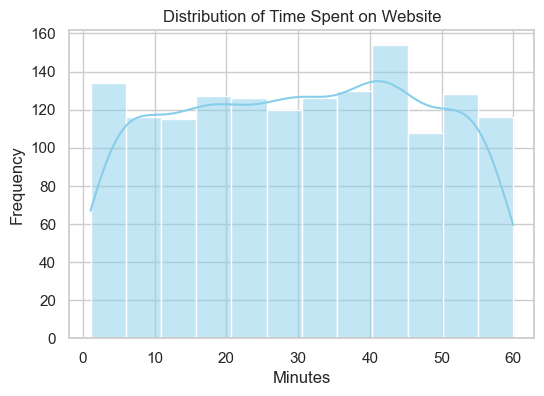

In [11]:
plt.figure(figsize = (6,4))
sns.histplot(df['TimeSpentOnWebsite'], kde = True, color = 'skyblue')
plt.title('Distribution of Time Spent on Website')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show();

### Observation

The distribution of `TimeSpentOnWebsite` initially looked quite uniform, but on closer inspection, I noticed a subtle trend:
* There is a gradual increase in user count up until 40-45 minutes, where the density peaks. This could suggest that customers who spend more time are slightly more engaged, though this relationship isn't sharply defined.

* What stood out to me was the drop-off after 45 minutes. Fewer users seem to stick around beyond that, which might imply either distraction, fatigue or that very few users actually need more time to  decide.

This makes `TimeSpentOnWebsite` and interesting candidate for further bivariate analysis. Especially against `PurchaseStatus`.

---

## Step 3: Univariate Analysis - Annual Income

Next, I explored `AnnualIncome` to understand how customer purchasing power varies across the dataset.  
Income often exhibits right-skewed distributions, and I wanted to check for such skewness or any extreme outliers that might impact the modeling process or require transformation.


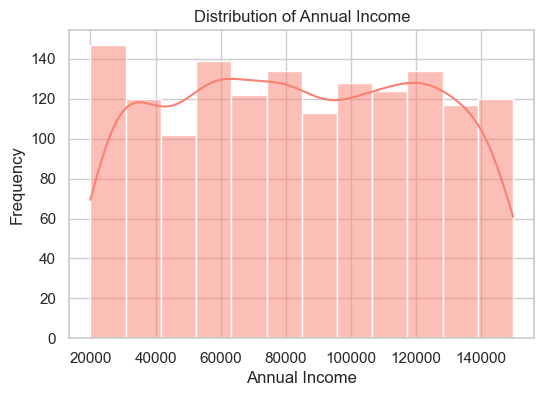

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['AnnualIncome'], kde=True, color='salmon')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

### Observation

The `AnnualIncome` distribution caught me by surprise. I initially expected a strong right skew,  
but the distribution turned out to be fairly balanced across income brackets ranging from $20,000 to $150,000.

There is a slight dip in the lowest and highest income ranges, which could mean fewer customers  
in those extremes. It also reassures me that we might **not** need to apply a log transformation here,  
as there's no extreme skew or outliers.

Still, I plan to explore later if income has any **predictive influence** on purchase behavior when paired with `PurchaseStatus`.

---

## Step 4: Univariate Analysis - Number of Purchases

Next, I turned my attention to `NumberOfPurchases` because it's a direct reflection of user activity.  
My assumption was that customers with more purchases might naturally be more inclined to convert.  
Before drawing any conclusions, I wanted to explore how purchase frequency is distributed across the customer base.


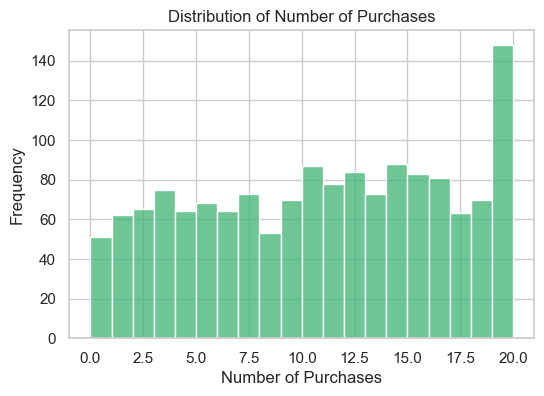

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df['NumberOfPurchases'], bins=20, kde=False, color='mediumseagreen')
plt.title('Distribution of Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


### Observation

This distribution confirmed a key assumption that customers vary quite a bit in how often they purchase, but what really caught my eye was the sharp spike at 20 purchases. It made me pause, why is that bar so high?

This suggests there might be a cap at 20, either from data collection limits or system-defined max purchase records.  
It could also mean that highly active users are grouped at the top.

This is something I’d consider when interpreting model outcomes or applying binning strategies later.  
I will also keep this in mind for outlier handling or feature scaling decisions.

---

## Step 5: Univariate Analysis - Discounts Availed

My next focus was on `DiscountsAvailed`. Intuitively, I believe customers who actively use discounts could be more likely to purchase, especially if promotions are a key part of the platform’s strategy.

Before tying this to outcomes, I wanted to understand how discount usage is distributed.

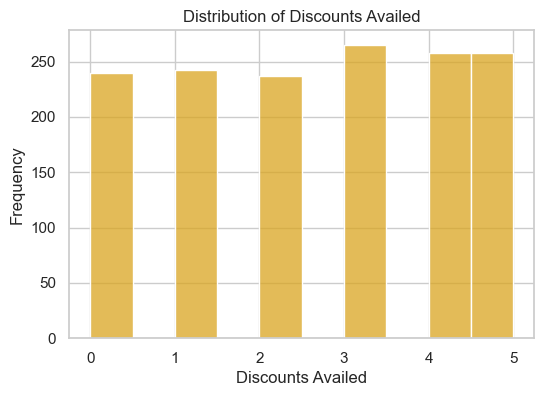

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(df['DiscountsAvailed'], bins=10, kde=False, color='goldenrod')
plt.title('Distribution of Discounts Availed')
plt.xlabel('Discounts Availed')
plt.ylabel('Frequency')
plt.show()

### Observation

The `DiscountsAvailed` feature was more evenly distributed than I expected.  
Each bucket from 0 to 5 has a reasonably consistent number of customers.

This tells me that discount usage is fairly common across the board. Not skewed to heavy users or non-users.  
It could mean the platform distributes discounts evenly, or that most customers take advantage of them when available.

What I’m curious to see later is whether higher discount usage correlates with actual purchases.  
If so, this feature might act as a good predictive lever in modeling.

---

## Step 6: Univariate Analysis - Age

I wanted to finish my univariate exploration by looking at `Age`.  
It is a foundational demographic feature, and often has non-linear relationships with behavior.  
Before I start segmenting or binning, I first needed to see how age is distributed.

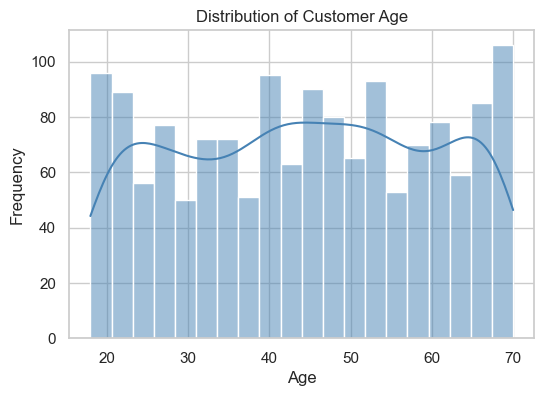

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True, color='steelblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Observation

The age distribution turned out to be wider than I expected. I noticed a fairly even spread from around 18 to 70 years old, but what stood out were the **peaks at both ends** : younger and older customers appear to be slightly more represented.

This kind of bi-modal shape is interesting because it hints at two possibly distinct user personas. That could become relevant later when I explore interactions between age and `PurchaseStatus`, or if I decide to segment users into age bands for modeling.

No extreme outliers showed up, so I’m comfortable keeping this variable as-is for now.

---

## Step 7: Bivariate Analysis - Time Spent vs Purchase Status

After analyzing `TimeSpentOnWebsite` on its own, I wanted to understand if there's a meaningful difference  
in behavior between customers who purchased and those who didn’t.

My hypothesis was simple: if spending more time leads to conversion, I should see a higher median `TimeSpentOnWebsite`  
for customers who made a purchase.


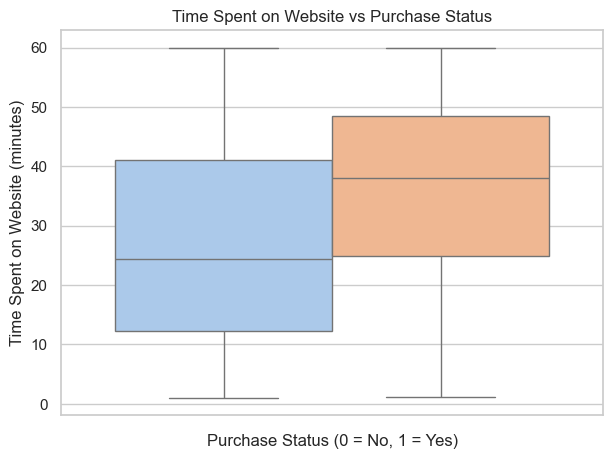

In [46]:
plt.figure(figsize=(7, 5))
sns.boxplot(hue = 'PurchaseStatus', legend = False, y = 'TimeSpentOnWebsite', data = df, palette = 'pastel')
plt.title('Time Spent on Website vs Purchase Status')
plt.xlabel('Purchase Status (0 = No, 1 = Yes)')
plt.ylabel('Time Spent on Website (minutes)')
plt.show()

### Observation

This result really confirmed what I was hoping to see. Customers who ended up making a purchase spent noticeably more time on the website compared to those who didn’t.

The median `TimeSpentOnWebsite` is clearly higher for purchasers, and the interquartile range is also shifted upward. While there’s still overlap between the two groups, the trend is strong enough to consider this a **high-potential feature** for modeling.

This also makes me think about time-based segmentation or interaction terms I could experiment with later.

---


## Step 8: Bivariate Analysis - Annual Income vs Purchase Status

After seeing a clear difference in time spent between buyers and non-buyers, I was curious whether **income levels** played a role in purchase behavior.  

My hypothesis was that customers with higher income might have a higher purchase likelihood. But I wanted to test that assumption visually.


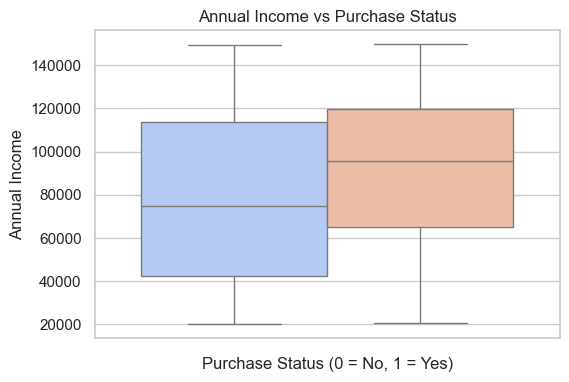

In [48]:
plt.figure(figsize=(6, 4))
sns.boxplot(hue = 'PurchaseStatus', legend = False, y='AnnualIncome', data=df, palette='coolwarm')
plt.title('Annual Income vs Purchase Status')
plt.xlabel('Purchase Status (0 = No, 1 = Yes)')
plt.ylabel('Annual Income')
plt.show()

### Observation

This result backed up my initial assumption—customers who made a purchase tend to have higher incomes.  
The median annual income is noticeably higher for purchasers, and the entire distribution is shifted upward.

Whats interesting is that the spread also seems tighter for non-purchasers, while the purchasing group includes a wider range of income levels. This suggests that higher income may increase likelihood of conversion, but not all high earners necessarily buy.

It also gives me confidence that `AnnualIncome` could be a meaningful feature during modeling.

---

## Step 9: Bivariate Analysis - Discounts Availed vs Purchase Status

Next, I looked at `DiscountsAvailed` to see if customers who redeemed more discounts were more likely to make a purchase.  
The idea was simple: if discounts are working, they should be pulling people across the conversion line.

To explore that, I visualized how discount usage varied between buyers and non-buyers.


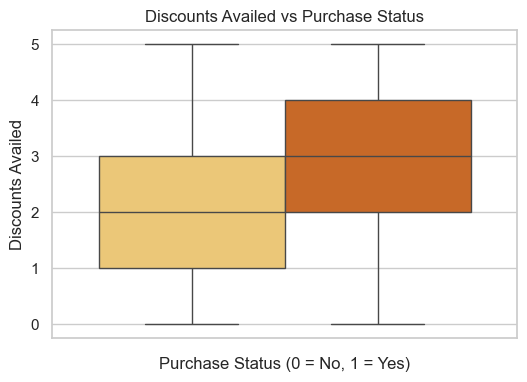

In [49]:
plt.figure(figsize=(6, 4))
sns.boxplot(hue ='PurchaseStatus', legend = False, y='DiscountsAvailed', data=df, palette='YlOrBr')
plt.title('Discounts Availed vs Purchase Status')
plt.xlabel('Purchase Status (0 = No, 1 = Yes)')
plt.ylabel('Discounts Availed')
plt.show()


### Observation

There’s a noticeable (though not dramatic) difference here. Purchasers tend to use slightly more discounts than non-purchasers. The median `DiscountsAvailed` is higher for buyers, and the entire box is shifted upward.

While the overlap is still significant, this trend suggests that discount availability could have some influence on conversion behavior. It might also reflect promotional strategies that successfully target high-intent customers.

This confirms my suspicion that discount usage should stay in the model as a behavioral predictor.

---